In [1]:
# Add DEVENV_PATH to the path so that we can import the modules
import sys
from os import getenv
import numpy as np
sys.path.append(getenv("DEVENV_ROOT"))

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import greenflow.analysis as an
from entrypoint import load_gin
from greenflow.utils import convert_to_mib

cutoff = "2024-12-16T03:15:35.626996+01:00"
cutoff_end = "2025-01-07T03:15:35.626996+01:00"

load_gin(exp_name="ingest-kafka", test=False)


[WARNING]: failed to patch stdout/stderr for fork-safety: 'OutStream' object
has no attribute 'buffer'
[WARNING]: failed to reconfigure stdout/stderr with the replace error handler:
'OutStream' object has no attribute 'reconfigure'


In [2]:

def compare_network_saturation(data):
    # Set the style
    sns.set_style("whitegrid")
    data = data.copy()
    # Convert network saturation to percentage
    data['network_saturation'] = data['network_saturation'] * 100

    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Use seaborn's color palette
    palette = sns.color_palette("deep")
    
    # Create scatter plot with trend lines using seaborn
    sns.scatterplot(
        data=data,
        x='messageSize',
        y='network_saturation',
        hue='cluster',
        alpha=0.6,
        ax=ax
    )
    
    # Add trend lines for each cluster
    for i, cluster in enumerate(data['cluster'].unique()):
        cluster_data = data[data['cluster'] == cluster]
        
        # Add trend line
        z = np.polyfit(cluster_data['messageSize'], cluster_data['network_saturation'], 1)
        p = np.poly1d(z)
        ax.plot(
            cluster_data['messageSize'],
            p(cluster_data['messageSize']),
            linestyle='--',
            color=palette[i],
            alpha=0.8
        )
    
    # Customize the plot
    ax.set_title('Network Saturation Comparison Across Cluster Sizes')
    ax.set_xlabel('Message Size (bytes)')
    ax.set_ylabel('Network Saturation (%)')
    
    # Add horizontal line at 100% saturation
    ax.axhline(y=100, color='red', linestyle=':', alpha=0.5, label='Maximum Saturation')
    
    # Set y-axis limits from 0 to slightly above 100
    ax.set_ylim(0, 110)
    
    plt.tight_layout()
    plt.show()


In [3]:
common = dict(type="memImpact", cutoff_begin=cutoff, cutoff_end=cutoff_end, partitions=100)
cluster_data = an.full_analytical_pipeline(**common)

/tmp/ipykernel_3137987/3558254882.py:30: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(cluster_data['messageSize'], cluster_data['network_saturation'], 1)
/tmp/ipykernel_3137987/3558254882.py:30: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(cluster_data['messageSize'], cluster_data['network_saturation'], 1)
/tmp/ipykernel_3137987/3558254882.py:30: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(cluster_data['messageSize'], cluster_data['network_saturation'], 1)


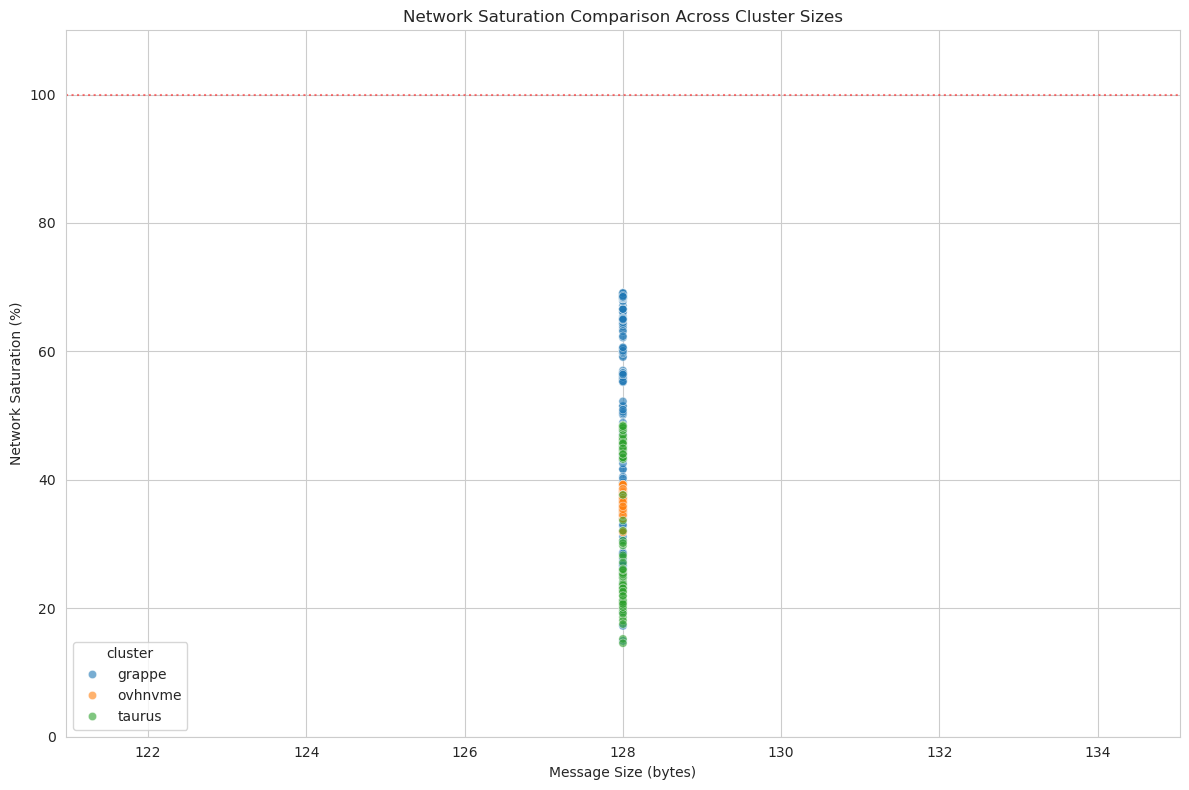

In [4]:
compare_network_saturation(cluster_data)